# Stock Price Prediction
- Predict stock price with LSTM neural network
- Build dashbord with streamlit


In [68]:
# Import library
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [69]:
df_nse = pd.read_csv(r"Dataset\NSE-TATAGLOBAL.csv")
df_sd  = pd.read_csv(r"Dataset\stock_data.csv")

In [70]:
df_nse

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09
...,...,...,...,...,...,...,...,...
2095,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100.0,694.98
2096,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440.0,780.01
2097,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312.0,340.31
2098,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312.0,355.17


In [71]:
df_sd

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL
...,...,...,...,...,...,...,...,...
19581,2017-11-06,178.56000,180.45000,178.31000,180.17000,13275578,0,FB
19582,2017-11-07,180.50000,180.74800,179.40300,180.25000,12903836,0,FB
19583,2017-11-08,179.79000,180.35000,179.11000,179.56000,10467606,0,FB
19584,2017-11-09,178.31000,179.40000,177.09000,179.30000,12602188,0,FB


### Close Price

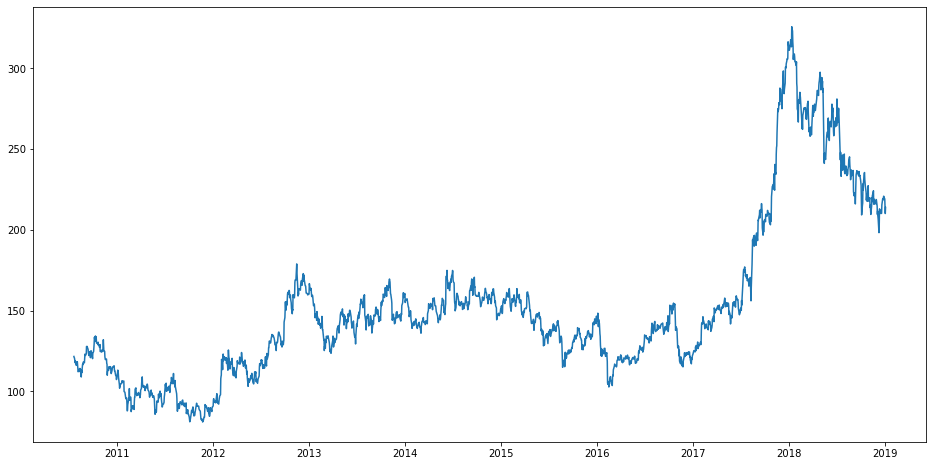

In [72]:
df_nse['Date'] = pd.to_datetime(df_nse['Date'],format="%Y-%m-%d")
df_nse.index = df_nse['Date']
# df_nse.drop(columns=["Date"],axis=1,inplace=True)
plt.figure(figsize=(16,8))
plt.plot(df_nse["Close"], label='Close Price history')

### Sort the dataset on date time and filter “Date” and “Close” columns

In [73]:
df_nse = df_nse.sort_index(ascending=True,axis=0)
nse_new = pd.DataFrame(index=range(0,len(df_nse)),columns=["Date","Close"])
for i in range(0, len(df_nse)):
    nse_new["Date"][i] = df_nse["Date"][i]
    nse_new["Close"][i] = df_nse["Close"][i]

### Normalize the new filtered dataset

In [74]:
scaler = MinMaxScaler(feature_range=(0,1))
final_nse = nse_new.values

train_data = final_nse[0:967,:]
valid_data = final_nse[967:,:]

In [75]:
nse_new.index = nse_new.Date
nse_new.drop("Date",axis=1,inplace=True)
scaled_data = scaler.fit_transform(final_nse)

X_train, y_train = [],[]
for i in range(60,len(train_data)):
    X_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

### Build model

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=nse_new[len(nse_new)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(X_train,y_train,epochs=10,batch_size=32,verbose=2)

Epoch 1/10
51/51 - 5s - loss: 0.0076 - 5s/epoch - 93ms/step
Epoch 2/10
51/51 - 1s - loss: 5.5026e-04 - 851ms/epoch - 17ms/step
Epoch 3/10
51/51 - 1s - loss: 5.3986e-04 - 864ms/epoch - 17ms/step
Epoch 4/10
51/51 - 1s - loss: 4.8333e-04 - 862ms/epoch - 17ms/step
Epoch 5/10
51/51 - 1s - loss: 4.5713e-04 - 808ms/epoch - 16ms/step
Epoch 6/10
51/51 - 1s - loss: 4.5208e-04 - 788ms/epoch - 15ms/step
Epoch 7/10
51/51 - 1s - loss: 4.2105e-04 - 793ms/epoch - 16ms/step
Epoch 8/10
51/51 - 1s - loss: 4.0414e-04 - 807ms/epoch - 16ms/step
Epoch 9/10
51/51 - 1s - loss: 3.8226e-04 - 787ms/epoch - 15ms/step
Epoch 10/10
51/51 - 1s - loss: 3.6143e-04 - 825ms/epoch - 16ms/step


In [ ]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

14/14 [==============================] - 1s 7ms/step


In [ ]:
lstm_model.save("closing_price.h5")

In [ ]:
train_data=nse_new[:987]
valid_data=nse_new[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

ValueError: Length of values (420) does not match length of index (1113)